In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

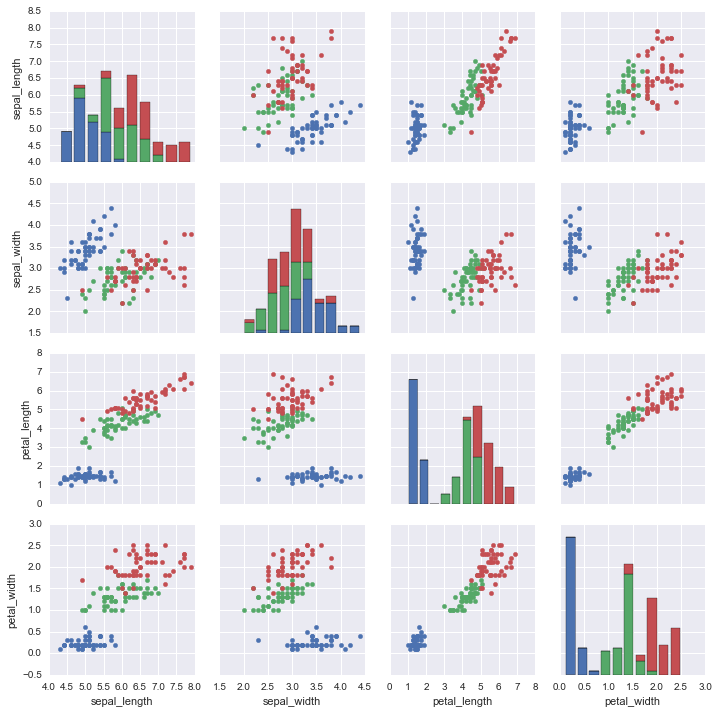

In [2]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris, hue="species")
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

In [3]:

def heatmap4grid(x, y, **kwargs):
    df = pd.concat([x, y], axis=1)
    df["dummy"] = 1
    pivoted = df.pivot_table(index=x.name, columns=y.name, values="dummy", aggfunc=len)
    sns.heatmap(pivoted)

def plot_corr(x, y, **kwargs):
    """
    http://stackoverflow.com/questions/30942577/seaborn-correlation-coefficient-on-pairgrid
    """
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("corr = {:.3f}".format(r), xy=(.1, .5), fontsize=24)
    
g = sns.PairGrid(iris)
g.map_lower(heatmap4grid)
g.map_diag(sns.distplot, kde=False)
g.map_upper(plot_corr)
